In [1]:
import pandas as pd
import psycopg2 as pg2
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
#Create a symbol list and receive validate input from user

df = pd.read_csv('nyselisted.csv')
symbol_list = list(df['Symbol'])

v = True
while v:    
    my_tickers = input("Please input as many tickers as you are intrested, please use the symbol name for each ticker and use space to seperate different ones: ")
    my_tickers_list = my_tickers.split(' ')
    print(my_tickers_list)
    i = 0
    while len(my_tickers_list) > 0:
        if my_tickers_list[0] in symbol_list:
            my_tickers_list.pop(0)
        else:
            print(f'Ticker {my_tickers_list[0]} is not valid! Please enter a valid symbol.')
            my_tickers_list.pop(0)
            i+=1
    if i == 0:
        v = False
        print("All inputs are valid!")

Please input as many tickers as you are intrested, please use the symbol name for each ticker and use space to seperate different ones: AAPL TSLA NIO BABA
['AAPL', 'TSLA', 'NIO', 'BABA']
All inputs are valid!


In [3]:
ticker_list = yf.Tickers(my_tickers).tickers

In [4]:
def sql_insert():    
    conn = pg2.connect(database='Stock_Project', 
                       user='postgres', 
                       password='*********',  #Need the actual password
                       host="127.0.0.1",
                       port="5432")
    # Create a cursor to perform database operations
    cur = conn.cursor()
    cur.execute("""INSERT INTO stocks.stock_info (symbol, timestamp, current_price, high_price, low_price, open_price)
               Values(%s,CURRENT_TIMESTAMP,%s,%s,%s,%s);commit;""",
                (symbol, current_quote, high_price, low_price, open_price,
                )
                )

In [5]:
def my_tickers_alert(ticker):
        change_pct = round((current_quote - open_price)/open_price, 4)
        print(change_pct)
        if change_pct > 0.05 or change_pct < -0.05:
            print(f"{ticker}'s price' has a big difference right now ({change_pct}), do you want to sell or buy?")

In [6]:
import time
import datetime

while True:
    a = datetime.datetime.today().weekday() in list(range(0,5))

    now = datetime.datetime.now()
    open_time = now.replace(hour=8, minute=30, second=0, microsecond=0)
    close_time = now.replace(hour=15, minute=0, second=0, microsecond=0)
    b = now > open_time and now < close_time

    while a and b: 
        for ticker in ticker_list:
            info = ticker.info
            history = ticker.history()
            symbol = info['symbol']
            current_quote = round(history.tail(1)['Close'].iloc[0], 2)
            high_price = round(info['dayHigh'], 2)
            low_price = round(info['dayLow'], 2)
            open_price = round(info['open'], 2)
            sql_insert()
            my_tickers_alert(ticker)
        #will keep running every 10 minutes
        time.sleep(600)
    time.sleep(60)

-0.0037
-0.0058
-0.0223
-0.0045
-0.0029
-0.0029
-0.0177
-0.0029
0.0012
0.0017
-0.009
-0.0021
0.0011
0.0004
-0.0028
-0.0042
-0.0004
-0.005
-0.0003
-0.0056
0.004
-0.0002
0.0114
-0.0055
0.0028
-0.0001
0.0182
-0.0056
0.0051
-0.0018
0.0194
-0.0055
0.0046
-0.0019
0.0182
-0.0073
0.0035
-0.0047
0.0194
-0.0076
0.0003
-0.0056
0.0201
-0.0086
0.0003
-0.0059
0.0218
-0.0089
0.0016
-0.0062
0.0201
-0.008
0.0034
-0.0047
0.0199
-0.009
0.0013
-0.0019
0.0268
-0.0087
0.0002
-0.0014
0.0208
-0.0085
0.0012
-0.0002
0.0249
-0.0083
0.0023
-0.0035
0.0232
-0.0092
-0.0007
-0.0055
0.0225
-0.0093
-0.0005
-0.0059
0.0192
-0.0079
-0.0009
-0.0049
0.0194
-0.0088
0.0004
-0.0053
0.0158
-0.0087
0.001
-0.0076
0.0166
-0.0079
0.0009
-0.0085
0.0229
-0.008
-0.001
-0.0115
0.0208
-0.0092
-0.0005
-0.0113
0.0244
-0.0093
0.0003
-0.0155
0.0229
-0.0099
-0.0001
-0.0146
0.0225
-0.008
-0.0001
-0.0121
0.023
-0.008
-0.0004
-0.0128
0.0191
-0.0074
0.0011
-0.0135
0.0184
-0.0067
0.001
-0.0081
0.0218
-0.0063
0.0026
-0.0061
0.0197
-0.0061
0.0017
-

KeyboardInterrupt: 

In [7]:
ticker_list[0].history().head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-11,128.997245,129.975779,128.308272,128.787552,100620900,0.0,0
2021-01-12,128.308263,129.496490,126.670711,128.607819,91951100,0.0,0
2021-01-13,128.567875,131.253864,128.298289,130.694702,88636800,0.0,0
2021-01-14,130.604846,130.804545,128.567881,128.717667,90221800,0.0,0
2021-01-15,128.587847,130.025701,126.810504,126.950294,111235300,0.0,0


In [8]:
ticker_list[0].info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 147000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store, that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with on-demand r

In [9]:
yf.Tickers(my_tickers).tickers

Tickers(AAPL=yfinance.Ticker object <AAPL>, TSLA=yfinance.Ticker object <TSLA>, NIO=yfinance.Ticker object <NIO>, BABA=yfinance.Ticker object <BABA>)

In [10]:
fb = yf.Ticker('FB')

In [11]:
fb.info

{'zip': '94025',
 'sector': 'Communication Services',
 'fullTimeEmployees': 58604,
 'longBusinessSummary': "Facebook, Inc. develops products that enable people to connect and share with friends and family through mobile devices, personal computers, virtual reality headsets, and in-home devices worldwide. The company's products include Facebook that enables people to connect, share, discover, and communicate with each other on mobile devices and personal computers; Instagram, a community for sharing photos, videos, and private messages; Messenger, a messaging application for people to connect with friends, family, groups, and businesses across platforms and devices; and WhatsApp, a messaging application that is used by people and businesses to communicate in a private way. It also provides Facebook Reality Labs, an augmented and virtual reality product that help people feel connected, anytime, and anywhere. Facebook, Inc. was founded in 2004 and is headquartered in Menlo Park, Californi

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


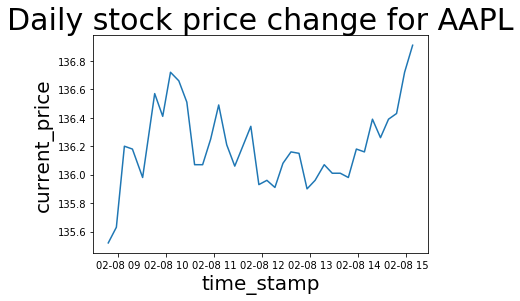

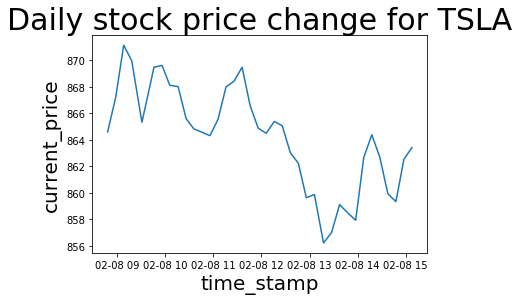

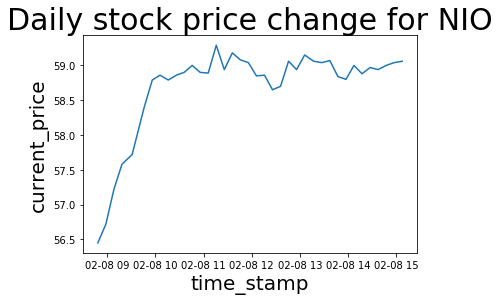

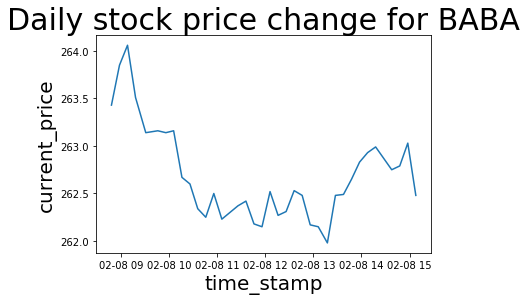

PostgreSQL connection is closed


KeyboardInterrupt: 

In [12]:
#Load data from postgresql to pandas dataframe
import schedule

def graph_drawing():
    try:
        conn = pg2.connect(database='Stock_Project', 
                               user='postgres', 
                               password='*********',  #Need actuall password here
                               host="127.0.0.1",
                               port="5432")
        cur = conn.cursor()
        my_tickers_list = my_tickers.split(' ')
        for my_ticker in my_tickers_list:
            df_2 = pd.read_sql_query(f"""SELECT symbol, timestamp, current_price FROM stocks.stock_info 
            WHERE symbol='{my_ticker}'
            AND date(timestamp)=date(current_timestamp)""",con=conn)
            y = df_2['current_price']
            x1 = df_2['timestamp']

            plt.plot(x1,y)
            plt.title(f'Daily stock price change for {my_ticker}', fontsize=30)
            plt.xlabel('time_stamp',fontsize=20)
            plt.ylabel('current_price', fontsize=20)
            plt.show()

    except (Exception, Error) as error:
        print("Error while connecting to PostgreSQL", error)

    finally:
        if (conn):
            cur.close()
            conn.close()
            print("PostgreSQL connection is closed")
            
schedule.every().day.at("15:15").do(graph_drawing)
while True:
    schedule.run_pending()
    time.sleep(1)